<a href="https://colab.research.google.com/github/Saad-7275/Saad-7275/blob/main/Pokemon_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('/content/Pokemon.csv')
df.head()
df.tail()
df.drop('#', inplace = True, axis =1)
df.head()
df.shape
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
df.isnull().sum()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Total,800.0,435.10250,119.963040,180.0,330.00,450.0,515.0,780.0
HP,800.0,69.25875,25.534669,1.0,50.00,65.0,80.0,255.0
Attack,800.0,79.00125,32.457366,5.0,55.00,75.0,100.0,190.0
Defense,800.0,73.84250,31.183501,5.0,50.00,70.0,90.0,230.0
Sp. Atk,800.0,72.82000,32.722294,10.0,49.75,65.0,95.0,194.0
Sp. Def,800.0,71.90250,27.828916,20.0,50.00,70.0,90.0,230.0
Speed,800.0,68.27750,29.060474,5.0,45.00,65.0,90.0,180.0
Generation,800.0,3.32375,1.661290,1.0,2.00,3.0,5.0,6.0


In [5]:
df.isnull().sum()
df['Type 2'].value_counts()

mode_value = df['Type 2'].mode()[0]
df['Type 2'].fillna(mode_value, inplace = True)

df['Type 2'].isnull().sum()


0

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

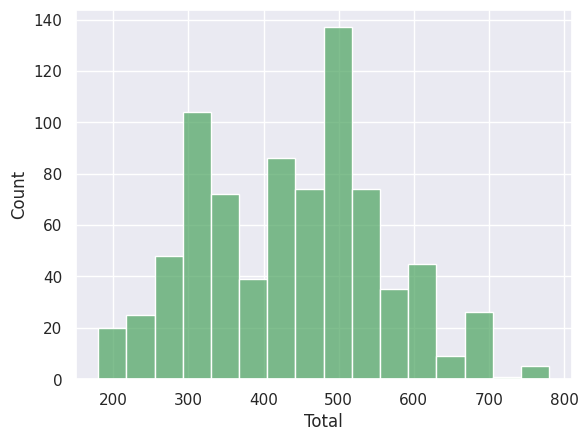

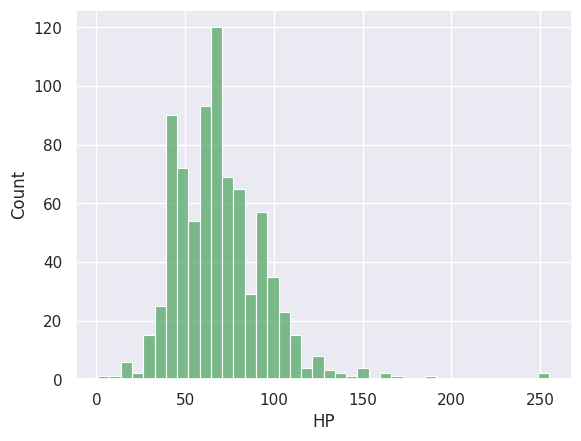

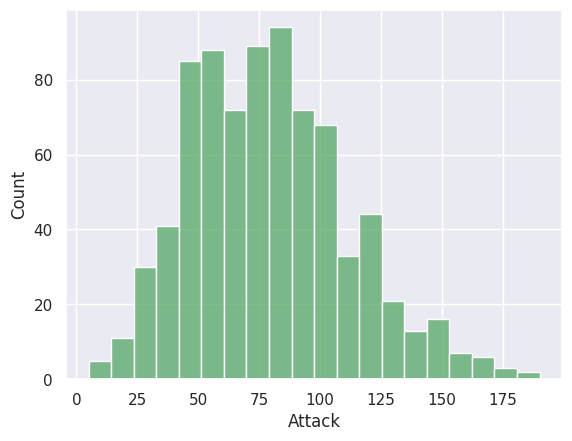

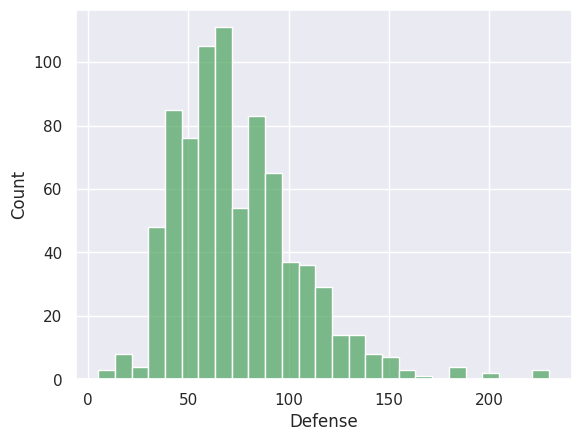

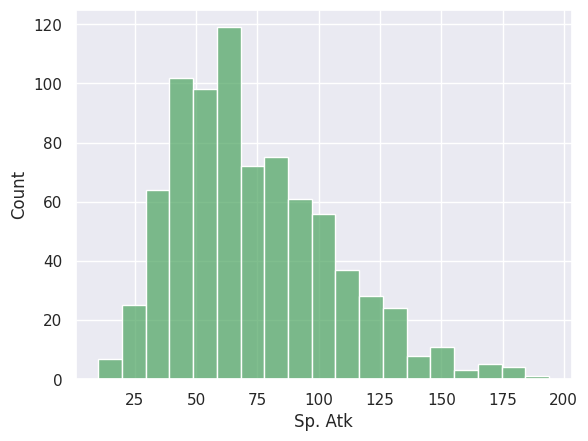

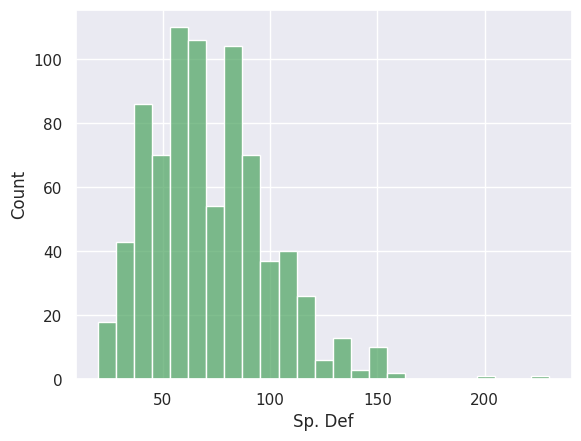

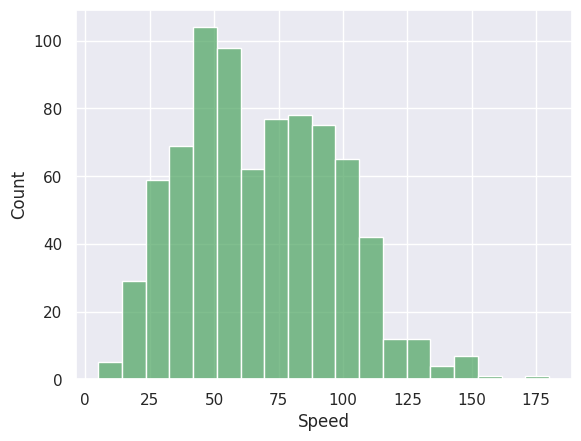

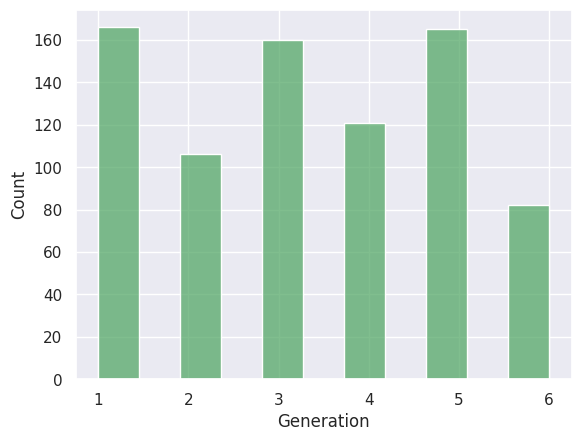

In [7]:
for i in df.columns:
  if ((df[i].dtype != 'object') & (i != 'Legendary')):
    sns.set()
    sns.histplot(df[i], color = 'g')
    plt.xlabel(i)
    plt.show()


Now We Will Check for Outliers in the dataset and clear them

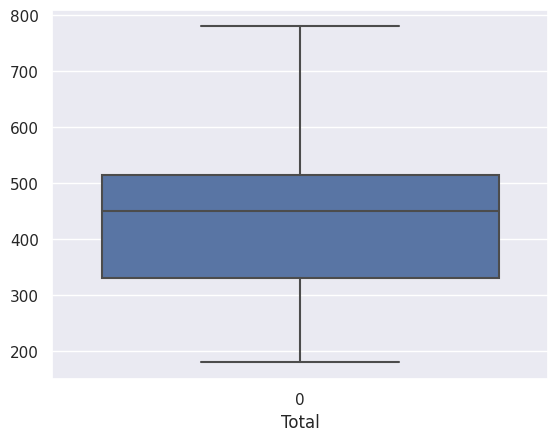

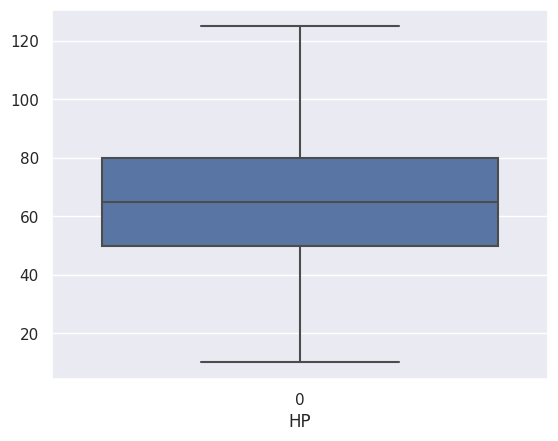

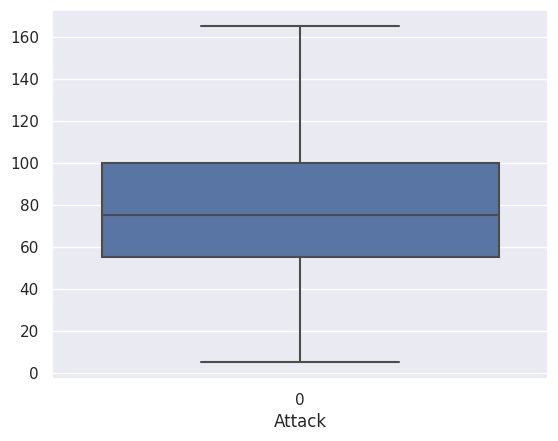

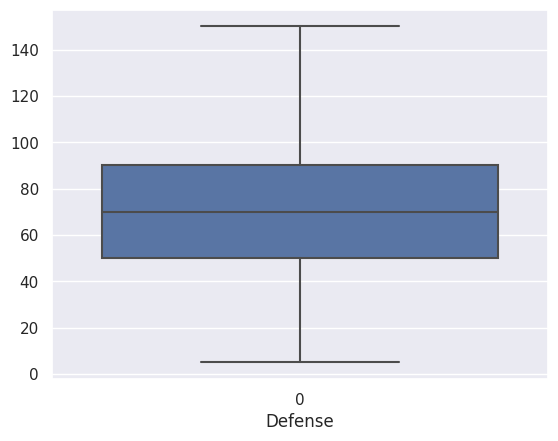

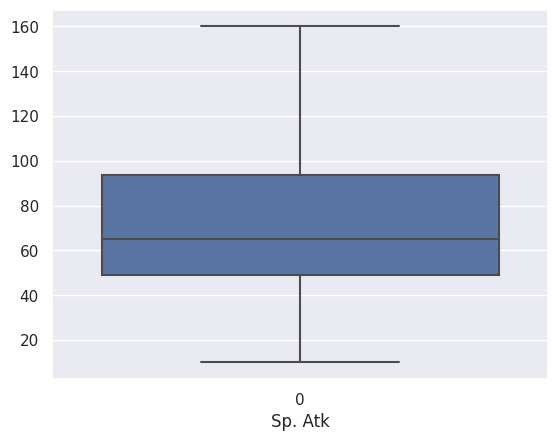

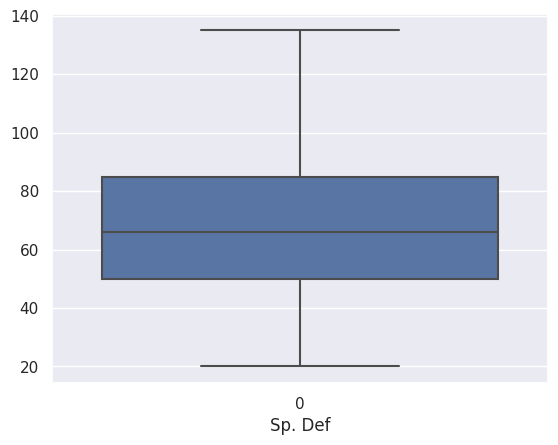

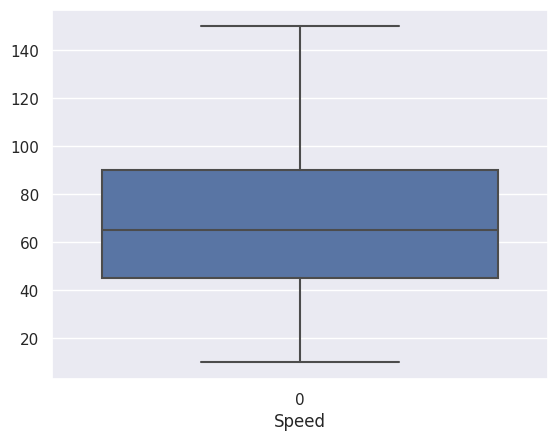

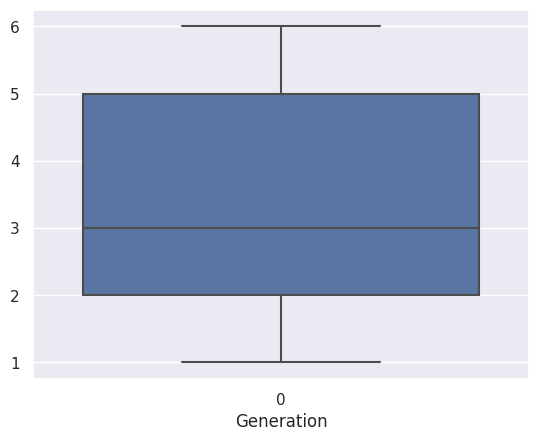

In [8]:
for i in df.columns:
  if ((df[i].dtype != 'object') & (i != 'Legendary')):
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)

    IQR = Q3 - Q1
    UB = Q3 + 1.5 * IQR
    LB = Q1 - 1.5 * IQR

    df = (df[(df[i] <= UB) & (df[i] >= LB)])

    sns.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

In [9]:
df[df['Generation'] == 5].count()

Name          162
Type 1        162
Type 2        162
Total         162
HP            162
Attack        162
Defense       162
Sp. Atk       162
Sp. Def       162
Speed         162
Generation    162
Legendary     162
dtype: int64

In [10]:
max_defense = df['Defense'].max()

pokemon_with_highest_defense = df[df['Defense'] == max_defense]

num_highest_defense = len(pokemon_with_highest_defense)

print(num_highest_defense)

3


In [11]:
collinearity_among_col = df.corr()
print(collinearity_among_col)

               Total        HP    Attack   Defense   Sp. Atk   Sp. Def  \
Total       1.000000  0.702611  0.747859  0.663239  0.744312  0.745589   
HP          0.702611  1.000000  0.531446  0.418200  0.426416  0.467977   
Attack      0.747859  0.531446  1.000000  0.508498  0.354633  0.323823   
Defense     0.663239  0.418200  0.508498  1.000000  0.293844  0.536065   
Sp. Atk     0.744312  0.426416  0.354633  0.293844  1.000000  0.556366   
Sp. Def     0.745589  0.467977  0.323823  0.536065  0.556366  1.000000   
Speed       0.600941  0.240927  0.373080  0.070178  0.446036  0.318969   
Generation  0.062648  0.111351  0.047644  0.059307  0.051432  0.028942   
Legendary   0.419776  0.280701  0.278302  0.220979  0.386882  0.288273   

               Speed  Generation  Legendary  
Total       0.600941    0.062648   0.419776  
HP          0.240927    0.111351   0.280701  
Attack      0.373080    0.047644   0.278302  
Defense     0.070178    0.059307   0.220979  
Sp. Atk     0.446036    0.051

<ipython-input-11-0f1317f1906d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  collinearity_among_col = df.corr()


In [12]:
df['Legendary'].value_counts()
df.isnull().sum()

Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [13]:
!pip install sklearn.metric

ERROR: Could not find a version that satisfies the requirement sklearn.metric (from versions: none)
ERROR: No matching distribution found for sklearn.metric


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder


In [ ]:
categorical_columns = []
for i in df.columns:
  if df[i].dtype == 'object':
    categorical_columns.append(i)

onehot_encoder = OneHotEncoder(sparse = False)
for col in categorical_columns:
  encoded_columns = pd.DataFrame(onehot_encoder.fit_transform(df[col]), columns = onehot_encoder.get_feature_names([col]))



In [17]:
df = df.iloc[:, :12]
df.head()
df.isnull().sum()

Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [18]:
X = df.drop(['Legendary', 'Name', 'Type 1', 'Type 2'], axis = 1)
Y = df['Legendary']



In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3,
                                                    random_state = 1)

X_train.shape
Y_train.shape
X_test.shape

(222, 8)

In [20]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [21]:
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)
Y_pred = dt.predict(X)

In [22]:
confusion_matrix(Y_train, y_pred_train)


array([[490,   0],
       [  1,  26]])

In [23]:
confusion_matrix(Y_test, y_pred_test)

array([[203,   4],
       [  3,  12]])

In [24]:
confusion_matrix(Y, Y_pred)

array([[693,   4],
       [  4,  38]])

In [25]:
print(classification_report(Y_train, y_pred_train))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       490
        True       1.00      0.96      0.98        27

    accuracy                           1.00       517
   macro avg       1.00      0.98      0.99       517
weighted avg       1.00      1.00      1.00       517



In [26]:
print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

       False       0.99      0.98      0.98       207
        True       0.75      0.80      0.77        15

    accuracy                           0.97       222
   macro avg       0.87      0.89      0.88       222
weighted avg       0.97      0.97      0.97       222



In [27]:
print(classification_report(Y, Y_pred))

              precision    recall  f1-score   support

       False       0.99      0.99      0.99       697
        True       0.90      0.90      0.90        42

    accuracy                           0.99       739
   macro avg       0.95      0.95      0.95       739
weighted avg       0.99      0.99      0.99       739



In [28]:
from sklearn.tree import export_graphviz
import pydotplus


In [29]:
feature_names = X_train.columns
target_name = Y_train.name
dot_data = export_graphviz(dt, out_file = None, feature_names = feature_names, class_names = target_name)

graph = pydotplus.graph_from_dot_data(dot_data)
print(graph)

graph.write_pdf('Pokemon2.pdf')

True